# Keras

https://keras.io/ko/getting-started/sequential-model-guide/

In [1]:
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [2]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


#### optimizer
https://keras.io/ko/optimizers/

In [4]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

### Exercise 1 (binary classification)

Please complete the code so that training works properly.  

In [5]:
# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=100))  ### Fill the blank
model.add(Dense(1, activation= 'sigmoid'))                    ### Fill the blank
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',                                          ### Fill the blank
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 0s 158us/sample - loss: 0.7103 - acc: 0.5040
Epoch 2/10
1000/1000 [==============================] - 0s 30us/sample - loss: 0.6878 - acc: 0.5510
Epoch 3/10
1000/1000 [==============================] - 0s 22us/sample - loss: 0.6807 - acc: 0.5680
Epoch 4/10
1000/1000 [==============================] - 0s 28us/sample - loss: 0.6730 - acc: 0.5740
Epoch 5/10
1000/1000 [==============================] - 0s 27us/sample - loss: 0.6684 - acc: 0.5930
Epoch 6/10
1000/1000 [==============================] - 0s 24us/sample - loss: 0.6673 - acc: 0.6060
Epoch 7/10
1000/1000 [==============================] - 0s 26us/sample - loss: 0.6545 - acc: 0.6060
Epoch 8/10
1000/1000 [==============================] - 0s 25us/sample - loss: 0.6569 - acc: 0.6190
Epoch 9/10
1000/1000 [==============================] - 0s 22us/sample - loss: 0.65

### Exercise 2 (multiclass classification)

Please complete the code so that training works properly.  

In [6]:
# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=100))   ### Fill the blank
model.add(Dense(10 , activation='softmax'))                     ### Fill the blank
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',                                          ### Fill the blank
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
one_hot_labels = tensorflow.keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 0s 68us/sample - loss: 2.3533 - acc: 0.1070
Epoch 2/10
1000/1000 [==============================] - 0s 22us/sample - loss: 2.3047 - acc: 0.1250
Epoch 3/10
1000/1000 [==============================] - 0s 21us/sample - loss: 2.2833 - acc: 0.1210
Epoch 4/10
1000/1000 [==============================] - 0s 21us/sample - loss: 2.2666 - acc: 0.1340
Epoch 5/10
1000/1000 [==============================] - 0s 25us/sample - loss: 2.2491 - acc: 0.1630
Epoch 6/10
1000/1000 [==============================] - 0s 48us/sample - loss: 2.2278 - acc: 0.1680
Epoch 7/10
1000/1000 [==============================] - 0s 22us/sample - loss: 2.2078 - acc: 0.1840
Epoch 8/10
1000/1000 [==============================] - 0s 25us/sample - loss: 2.1937 - acc: 0.2020
Epoch 9/10
1000/1000 [==============================] - 0s 22us/sample - loss: 2.1758 - acc: 0.2100
Epoch 10/10
1000/1000 [==============================] - 0s 29us/sample - loss

# Keras on mnist

https://keras.io/examples/vision/mnist_convnet/

### Exercise 3

### data preprocessing

In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [8]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    for x in mat:
        for y in x:
            print('%3s'%y, end=' ')
        print()

In [9]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape)
print("x_train[0] shape:", x_train[0].shape)
# matprint(x_train[0])

x_train shape: (60000, 28, 28)
x_train[0] shape: (28, 28)


In [10]:
# plt.imshow(x_train[0], cmap='gray')

In [11]:
# Model / data parameters
num_classes = 10
input_shape = x_train[0].shape

In [12]:
# convert class vectors to binary class matrices
print('before y shape:', y_train.shape)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('after  y shape:', y_train.shape)

before y shape: (60000,)
after  y shape: (60000, 10)


#### model structure and training

In [13]:
model = keras.Sequential(
    [
        layers.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(1024, activation="relu"),

        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [14]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 38us/sample - loss: 4.8582 - acc: 0.9118 - val_loss: 0.9337 - val_acc: 0.9533
Epoch 2/5
54000/54000 [==============================] - 2s 36us/sample - loss: 0.5102 - acc: 0.9620 - val_loss: 0.6545 - val_acc: 0.9547
Epoch 3/5
54000/54000 [==============================] - 2s 38us/sample - loss: 0.2574 - acc: 0.9724 - val_loss: 0.4397 - val_acc: 0.9650
Epoch 4/5
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2234 - acc: 0.9749 - val_loss: 0.5157 - val_acc: 0.9615
Epoch 5/5
54000/54000 [==============================] - 2s 41us/sample - loss: 0.1991 - acc: 0.9770 - val_loss: 0.5283 - val_acc: 0.9673


In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5004873933996652
Test accuracy: 0.9644


### Exercise 4: draw learning curve
https://www.kaggle.com/code/tobikaggle/keras-mnist-cnn-learning-curve

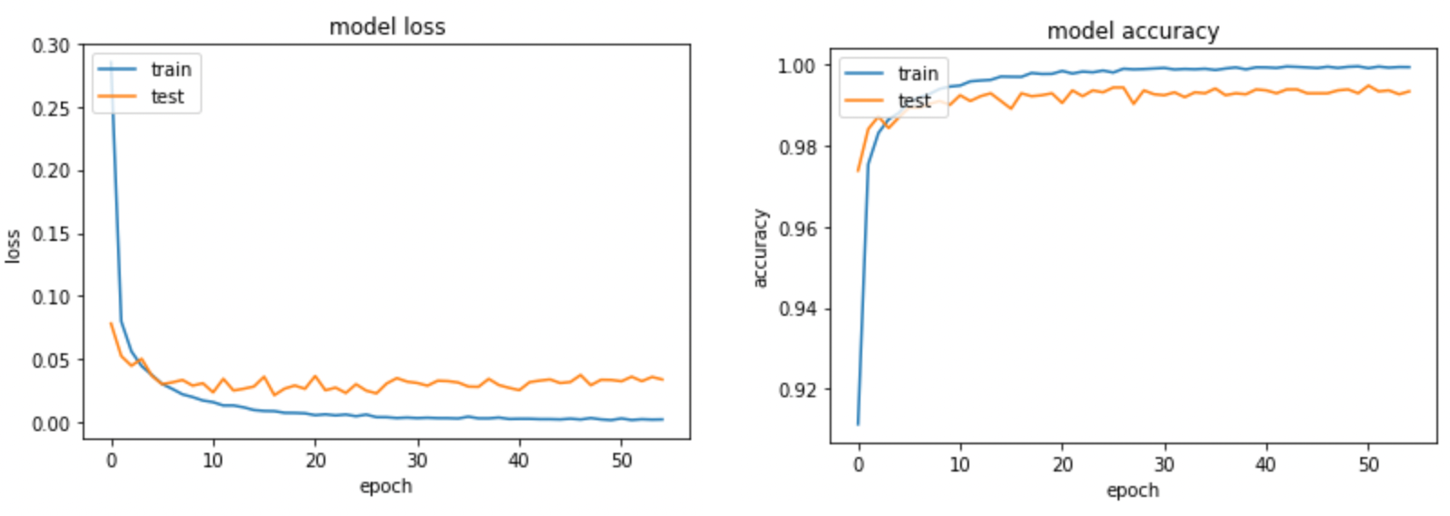

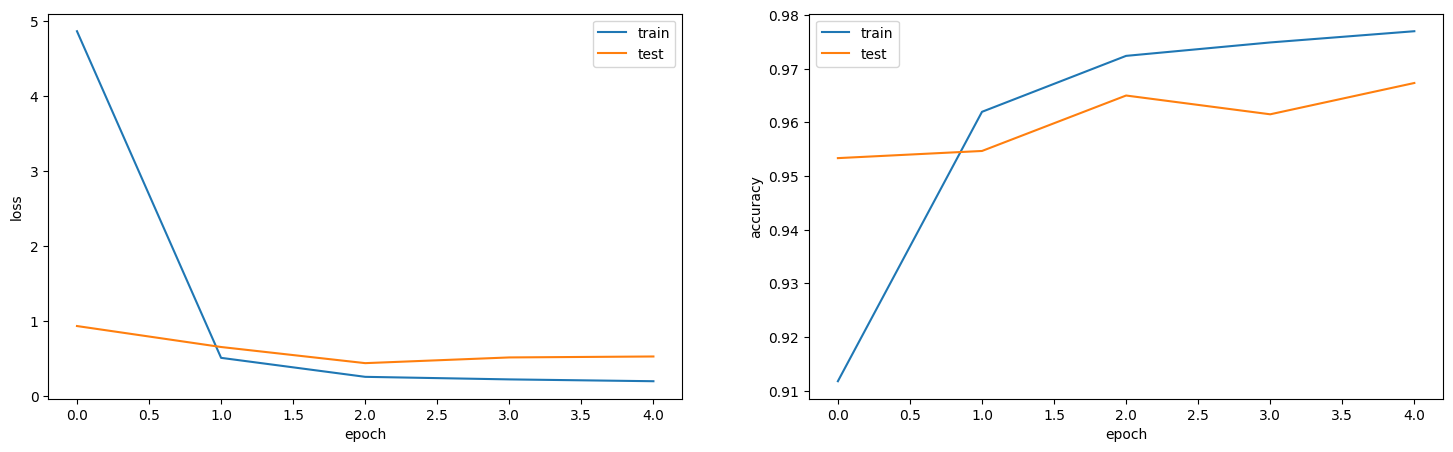

In [26]:
# Write your code to draw learning curve
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


fig, ax = plt.subplots(1,2, figsize=(18,5))

ax[0].plot(loss, label='train')
ax[0].plot(val_loss, label='test')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend(loc='best')

ax[1].plot(acc, label='train')
ax[1].plot(val_acc, label='test')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend(loc='best')



# Keras on Breast cancer dataset

### Exercise 5: keras on breast cancer dataset

data preprocessing

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split # to split the data into two parts
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
data = datasets.load_breast_cancer()
x = data.data
y = data.target

In [3]:
print(x.shape, y.shape)
print(np.unique(y))

(569, 30) (569,)
[0 1]


In [4]:
y = keras.utils.to_categorical(y, 2)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

(569, 2)


In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


model building

In [6]:
num_classes = 2
input_shape = x.shape[1]

model = keras.Sequential(
    [
        layers.Input(shape=input_shape),   
        layers.Dense(8, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dropout(0.1),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 248       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 546
Trainable params: 546
Non-trainable params: 0
_________________________________________________________________


In [7]:
batch_size = 128
epochs = 50

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 409 samples, validate on 46 samples
Epoch 1/50
409/409 [==============================] - 0s 312us/sample - loss: 0.6208 - acc: 0.6895 - val_loss: 0.6016 - val_acc: 0.6957
Epoch 2/50
409/409 [==============================] - 0s 19us/sample - loss: 0.5896 - acc: 0.7090 - val_loss: 0.5705 - val_acc: 0.7174
Epoch 3/50
409/409 [==============================] - 0s 24us/sample - loss: 0.5599 - acc: 0.7531 - val_loss: 0.5410 - val_acc: 0.7609
Epoch 4/50
409/409 [==============================] - 0s 32us/sample - loss: 0.5370 - acc: 0.7848 - val_loss: 0.5152 - val_acc: 0.7826
Epoch 5/50
409/409 [==============================] - 0s 24us/sample - loss: 0.5113 - acc: 0.8117 - val_loss: 0.4912 - val_acc: 0.8261
Epoch 6/50
409/409 [==============================] - 0s 32us/sample - loss: 0.4896 - acc: 0.8313 - val_loss: 0.4686 - val_acc: 0.8261
Epoch 7/50
409/409 [==============================

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1061333448609762
Test accuracy: 0.9736842
